In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


**Data Import**

In [20]:
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
data1 = pd.read_csv("steam-200k.csv", names= ["ID", "Name","Purchase or Play","Hours","0"])

In [21]:
data.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data1.head()

,ID,Name,Purchase or Play,Hours,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


**Premature Data Analysis**

Total Samples: 16719


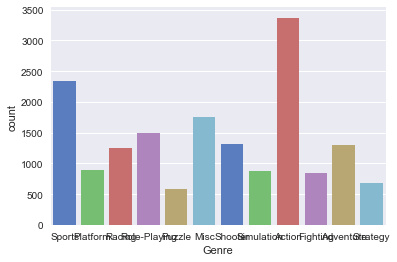

In [24]:
print("Total Samples:", len(data.index))

sns.countplot(x=data["Genre"], palette="muted")

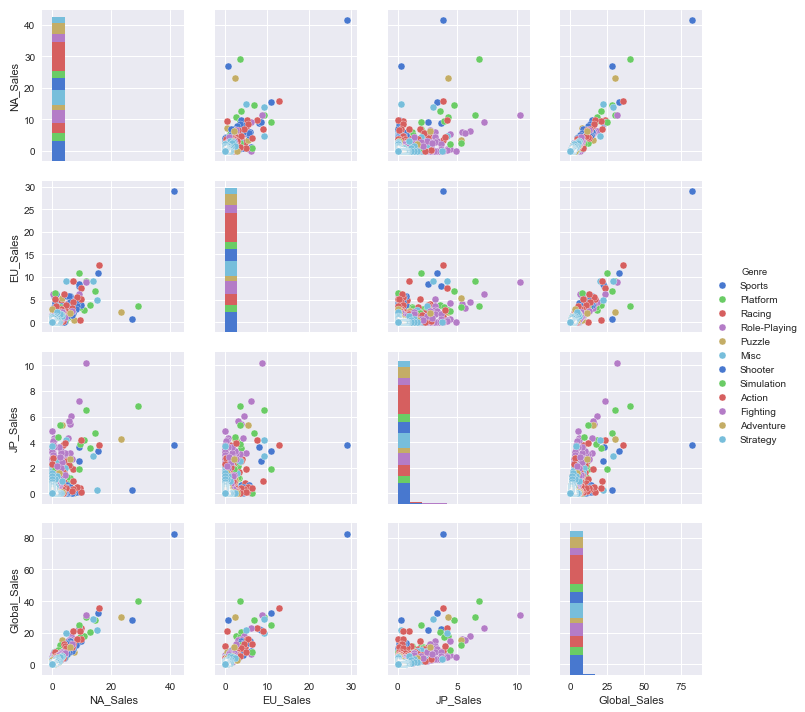

In [36]:
sns.pairplot(data, vars=["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"], hue="Genre", palette="muted")

In [28]:
print("Total Samples:", len(data1.index))


Total Samples: 200000


In [29]:
data.describe

<bound method NDFrame.describe of                                                     Name Platform  \
0                                             Wii Sports      Wii   
1                                      Super Mario Bros.      NES   
2                                         Mario Kart Wii      Wii   
3                                      Wii Sports Resort      Wii   
4                               Pokemon Red/Pokemon Blue       GB   
5                                                 Tetris       GB   
6                                  New Super Mario Bros.       DS   
7                                               Wii Play      Wii   
8                              New Super Mario Bros. Wii      Wii   
9                                              Duck Hunt      NES   
10                                            Nintendogs       DS   
11                                         Mario Kart DS       DS   
12                           Pokemon Gold/Pokemon Silver       GB   


In [38]:
data.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

**Data Preprocessing**

In [ ]:
data.dropna(thresh=2)
filtered_data = data[data['Critic_Score'].notnull()]
filtered_data = filtered_data[filtered_data['Critic_Count'].notnull()]
filtered_data = filtered_data[filtered_data['User_Score'].notnull()]
filtered_data = filtered_data[filtered_data['User_Count'].notnull()]
filtered_data = filtered_data[filtered_data['Developer'].notnull()]

filtered_data

In [ ]:
sns.pairplot(data, vars=["Global_Sales", "Critic_Score", "User_Score", "User_Count"], hue="Publisher", palette="muted")

C:\Users\Vincent\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Vincent\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


TypeError: '<=' not supported between instances of 'str' and 'float'